# Inferential Statistics Coded Project

#### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Problem 1

**Objective**
A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.

#### Data Overview

In [6]:
data = {
    "Position": ["Striker", "Forward", "Attacking Midfielder", "Winger"],
    "Players Injured": [45, 56, 24, 20],
    "Players Not Injured": [32, 38, 11, 9]
}  # Importing the data given in the question
df = pd.DataFrame(data)
df = df.set_index("Position", drop=True)
df["Total Players"] = df.sum(axis=1)
df.loc["Total Players"] = df.sum()
df

,Players Injured,Players Not Injured,Total Players
Position,,,
Striker,45,32,77
Forward,56,38,94
Attacking Midfielder,24,11,35
Winger,20,9,29
Total Players,145,90,235


The physiotherapist examined 235 male football players and found varying injury rates across positions. Strikers had the highest injuries (45 out of 77 players), followed by Forwards (56 out of 94). Attacking Midfielders experienced 24 injuries out of 35, while Wingers had 20 injuries out of 29. In total, 145 players were injured, and 90 remained injury-free.

Removing the Total values from the dataframe

In [24]:
df = df.drop("Total Players", axis=1)
df = df.drop("Total Players", axis=0)

##### 1. What is the probability that a randomly chosen player would suffer an injury?

In [25]:
total_injured_players = df["Players Injured"].sum()
total_players = df[["Players Injured", "Players Not Injured"]].sum().sum()
probability_of_injury = total_injured_players / total_players
print(f"The probability that a randomly chosen player would suffer an injury is: {probability_of_injury:.2%}")

The probability that a randomly chosen player would suffer an injury is: 61.70%


The probability of a randomly chosen player suffering an injury in the football team is approximately 61.70%, calculated by dividing the total number of injured players by the overall player count.

##### 2. What is the probability that a player is a forward or a winger?

In [26]:
forward_and_winger_players = df.loc[["Forward", "Winger"]].sum().sum()

probability_forward_or_winger = forward_and_winger_players / total_players

print(f"The probability that a player is a forward or a winger is: {probability_forward_or_winger:.2%}")

The probability that a player is a forward or a winger is: 52.34%


The probability that a player is either a forward or a winger in the football team is approximately 52.34%. This is determined by summing the players in the "Forward" and "Winger" positions and dividing it by the total number of players.

##### 3. What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [27]:
striker_injured_players = df.loc["Striker", "Players Injured"]

probability_striker_injury = striker_injured_players / total_players

print(f"The probability that a randomly chosen player plays in a striker position and has a foot injury is: {probability_striker_injury:.2%}")

The probability that a randomly chosen player plays in a striker position and has a foot injury is: 19.15%


The probability that a randomly chosen player both plays in a striker position and has a foot injury within the football team is approximately 19.15%. This is determined by dividing the number of injured strikers by the total number of players.

##### 4. What is the probability that a randomly chosen injured player is a striker?

In [28]:
striker_injured_players = df.loc["Striker", "Players Injured"]

total_injured_players = df["Players Injured"].sum()

probability_injured_striker = striker_injured_players / total_injured_players

print(f"The probability that a randomly chosen injured player is a striker is: {probability_injured_striker:.2%}")

The probability that a randomly chosen injured player is a striker is: 31.03%


The probability that a randomly chosen injured player is a striker within the football team is approximately 31.03%. This is calculated by dividing the number of injured strikers by the total number of injured players in the dataset.

### Problem 2

The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain;

##### 1. What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

The proportion of gunny bags with breaking strength less than 3.17 kg per sq. cm is: 0.1112


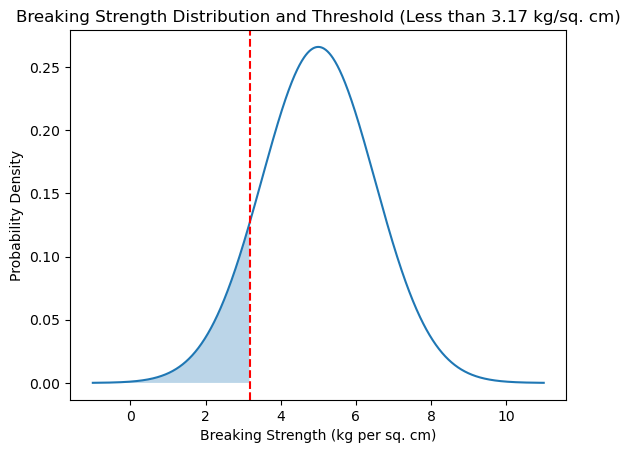

In [32]:

mean_strength = 5
std_dev = 1.5 
breaking_strength = 3.17  

z_score = (breaking_strength - mean_strength) / std_dev

probability_less_than = stats.norm.cdf(z_score)

print(f"The proportion of gunny bags with breaking strength less than 3.17 kg per sq. cm is: {probability_less_than:.4f}")

x = np.linspace(mean_strength - 4 * std_dev, mean_strength + 4 * std_dev, 1000)
y = stats.norm.pdf(x, mean_strength, std_dev)

plt.plot(x, y)
plt.fill_between(x, y, where=(x < breaking_strength), alpha=0.3)
plt.axvline(x=breaking_strength, color='red', linestyle='--')
plt.title('Breaking Strength Distribution and Threshold (Less than 3.17 kg/sq. cm)')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Probability Density')
plt.show()

The proportion of gunny bags with a breaking strength less than 3.17 kg per sq. cm is approximately 11.12%. This is determined using the z-score to calculate the probability and is visually represented in the provided probability density plot. The red dashed line marks the threshold breaking strength and the shaded region includes all gunny bags having breaking strength less than 3.17 kg per sq. cm.

##### 2. What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

The proportion of gunny bags with breaking strength of at least 3.6 kg per sq. cm is: 0.8247


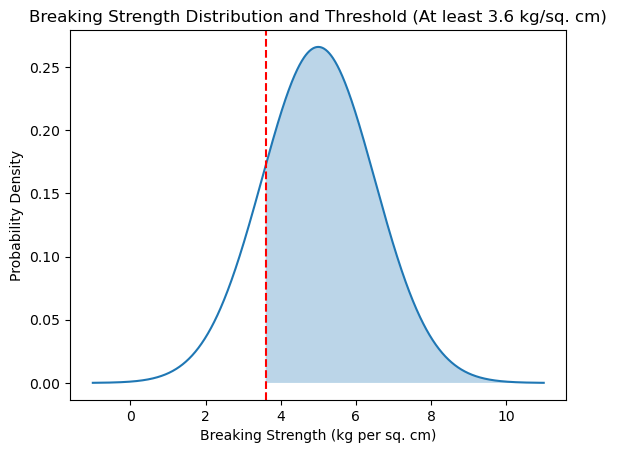

In [34]:

mean_strength = 5
std_dev = 1.5
breaking_strength = 3.6 

z_score = (breaking_strength - mean_strength) / std_dev

probability_at_least = 1 - stats.norm.cdf(z_score)

print(f"The proportion of gunny bags with breaking strength of at least 3.6 kg per sq. cm is: {probability_at_least:.4f}")

# Visual representation
x = np.linspace(mean_strength - 4 * std_dev, mean_strength + 4 * std_dev, 1000)
y = stats.norm.pdf(x, mean_strength, std_dev)

plt.plot(x, y)
plt.fill_between(x, y, where=(x >= breaking_strength), alpha=0.3)
plt.axvline(x=breaking_strength, color='red', linestyle='--')
plt.title('Breaking Strength Distribution and Threshold (At least 3.6 kg/sq. cm)')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Probability Density')
plt.show()

Approximately 82.47% of gunny bags have a breaking strength of at least 3.6 kg per sq. cm. This is determined using the z-score to calculate the complement of the cumulative distribution function. The probability is visually illustrated in the provided probability density plot, with the red dashed line indicating the threshold breaking strength.

##### 3. What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

The proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq. cm is: 0.1306


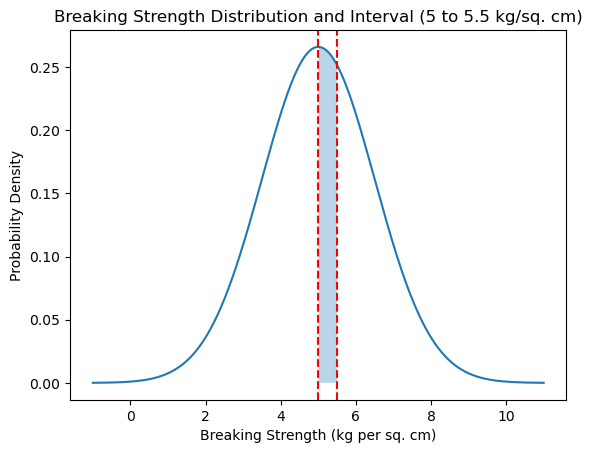

In [35]:

mean_strength = 5 
std_dev = 1.5 
lower_strength = 5 
upper_strength = 5.5  

z_score_lower = (lower_strength - mean_strength) / std_dev
z_score_upper = (upper_strength - mean_strength) / std_dev

probability_between = stats.norm.cdf(z_score_upper) - stats.norm.cdf(z_score_lower)

print(f"The proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq. cm is: {probability_between:.4f}")

# Visual representation
x = np.linspace(mean_strength - 4 * std_dev, mean_strength + 4 * std_dev, 1000)
y = stats.norm.pdf(x, mean_strength, std_dev)

plt.plot(x, y)
plt.fill_between(x, y, where=[(val >= lower_strength and val <= upper_strength) for val in x], alpha=0.3)
plt.axvline(x=lower_strength, color='red', linestyle='--')
plt.axvline(x=upper_strength, color='red', linestyle='--')
plt.title('Breaking Strength Distribution and Interval (5 to 5.5 kg/sq. cm)')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Probability Density')
plt.show()

Approximately 13.06% of gunny bags have a breaking strength between 5 and 5.5 kg per sq. cm. This is calculated using the z-scores corresponding to the lower and upper bounds of the specified range. The probability is visually represented in the provided probability density plot, with red dashed lines indicating the interval.

##### 4. What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

The proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg per sq. cm is: 0.1390


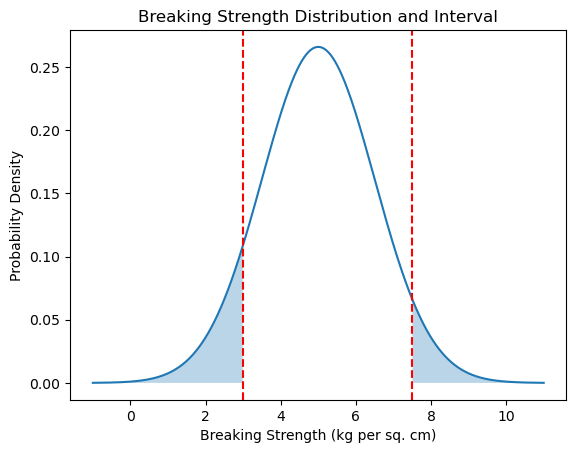

In [38]:
mean_strength = 5  
std_dev = 1.5 
lower_bound = 3  
upper_bound = 7.5  

z_score_lower = (lower_bound - mean_strength) / std_dev
z_score_upper = (upper_bound - mean_strength) / std_dev

probability_below_3 = stats.norm.cdf(z_score_lower)
probability_above_7_5 = 1 - stats.norm.cdf(z_score_upper)

probability_not_between_3_and_7_5 = (probability_below_3 + probability_above_7_5)

print(f"The proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg per sq. cm is: {probability_not_between_3_and_7_5:.4f}")

# Visual representation
x = np.linspace(mean_strength - 4 * std_dev, mean_strength + 4 * std_dev, 1000)
y = stats.norm.pdf(x, mean_strength, std_dev)

plt.plot(x, y)
plt.fill_between(x, y, where=[(val < lower_bound or val > upper_bound) for val in x], alpha=0.3)
plt.axvline(x=lower_bound, color='red', linestyle='--')
plt.axvline(x=upper_bound, color='red', linestyle='--')
plt.title('Breaking Strength Distribution and Interval')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Probability Density')
plt.show()

Approximately 13.90% of gunny bags have a breaking strength that is NOT between 3 and 7.5 kg per sq. cm. This is calculated by finding the the cumulative probabilities below the lower bound and above the upper bound. The sum of these probabilities gives the proportion of gunny bags with breaking strength outside the specified interval. The probability is visually depicted in the provided probability density plot, with red dashed lines with shaded areas indicating the interval.

### Problem 3

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

In [3]:
zingaro = pd.read_csv(r"C:\Users\Nitheesh\Downloads\Zingaro_Company.csv")

In [4]:
zingaro

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227
...,...,...
70,123.067611,142.293544
71,171.822218,140.124092
72,88.135994,141.393091
73,145.150397,131.370530


##### 1. Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?

**Define null and alternative hypotheses

Null Hypothesis (H0): The mean Brinell's hardness index of unpolished stones is suitable for printing or greater/equal to 150.

Alternative Hypothesis (H1): The mean Brinell's hardness index of unpolished stones is not suitable for printing or less than 150.

In [36]:
#one-sample t-test
t_statistic, p_value = stats.ttest_1samp(zingaro['Unpolished '], popmean=150)

alpha = 0.05  # Set the significance level

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that the mean hardness of unpolished stones is less than 150.")
    print("Zingaro is justified in thinking that unpolished stones may not be suitable for printing.")
else:
    print("Fail to reject the null hypothesis. There is no evidence that the mean hardness is less than 150.")
    print("Zingaro may not be justified in thinking that unpolished stones are unsuitable for printing.")

T-statistic: -4.164629601426757
P-value: 8.342573994839304e-05
Reject the null hypothesis. There is evidence that the mean hardness of unpolished stones is less than 150.
Zingaro is justified in thinking that unpolished stones may not be suitable for printing.


The p-value (8.342573994839304e-05) is significantly less than the chosen significance level (0.05), leading to the rejection of the null hypothesis. This provides strong evidence that the mean hardness of unpolished stones is less than 150. Therefore, Zingaro is justified in thinking that unpolished stones may not be suitable for printing.

##### 2. Is the mean hardness of the polished and unpolished stones the same?

**Define null and alternative hypotheses

Null Hypothesis (H0): The mean hardness of polished stones is equal to the mean hardness of unpolished stones.

Alternative Hypothesis (H1): The mean hardness of polished stones is not equal to the mean hardness of unpolished stones.

In [35]:
# two-sample t-test
t_statistic, p_value = stats.ttest_ind(zingaro['Unpolished '], zingaro['Treated and Polished'])

alpha = 0.05 # Set the significance level

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

T-statistic: -3.2422320501414053
P-value: 0.0014655150194628353
Reject the null hypothesis. There is evidence of a significant difference.


The two-sample t-test compares the mean hardness of polished and unpolished stones. The results indicate a significant difference, and therefore, the null hypothesis is rejected. This suggests that there is evidence of a notable distinction in hardness between the two types of stones.
The p-value (0.0014655150194628353) is significantly less than the chosen significance level (0.05), leading to the rejection of the null hypothesis. This provides evidence of a significant difference in the mean hardness between polished and unpolished stones. Therefore, it is concluded that the mean hardness of the polished and unpolished stones is not the same.

### Problem 4

Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

In [2]:
implant_data = pd.read_excel(r"C:\Users\Nitheesh\Downloads\Dental+Hardness+data.xlsx",sheet_name= 'Data')
implant_data

,Dentist,Method,Alloy,Temp,Response
0,1,1,1,1500,813
1,1,1,1,1600,792
2,1,1,1,1700,792
3,1,1,2,1500,907
4,1,1,2,1600,792
...,...,...,...,...,...
85,5,3,1,1600,483
86,5,3,1,1700,405
87,5,3,2,1500,536
88,5,3,2,1600,405


In [3]:
implant_data.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


In [4]:
implant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Dentist   90 non-null     int64
 1   Method    90 non-null     int64
 2   Alloy     90 non-null     int64
 3   Temp      90 non-null     int64
 4   Response  90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [9]:
implant_data.Dentist = pd.Categorical(implant_data.Dentist)
implant_data.Alloy = pd.Categorical(implant_data.Alloy)
implant_data.Method = pd.Categorical(implant_data.Method)
implant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Dentist   90 non-null     category
 1   Method    90 non-null     category
 2   Alloy     90 non-null     category
 3   Temp      90 non-null     int64   
 4   Response  90 non-null     int64   
dtypes: category(3), int64(2)
memory usage: 2.3 KB


In [12]:
print(implant_data['Alloy'].unique())

[1, 2]
Categories (2, int64): [1, 2]


##### 1. How does the hardness of implants vary depending on dentists?

##### Alloy 1

**Define null and alternative hypotheses

Null Hypothesis (H0): The mean hardness of metal implants is the same across all dentists for Alloy Type 1.

Alternative Hypothesis (H1): There is a significant difference in mean implant hardness among dentists for Alloy Type 1.

In [13]:
print(implant_data[implant_data['Alloy'] == 1].head())

  Dentist Method Alloy  Temp  Response
0       1      1     1  1500       813
1       1      1     1  1600       792
2       1      1     1  1700       792
6       1      2     1  1500       782
7       1      2     1  1600       698


In [20]:
alloy_1 = ols('Response ~ Dentist', data=implant_data[implant_data['Alloy'] == 1]).fit()
anova_table_1 = sm.stats.anova_lm(alloy_1, typ=2)

print("ANOVA Table for Alloy Type 1:")
print(anova_table_1)
tukey_1 = pairwise_tukeyhsd(endog=implant_data[implant_data['Alloy'] == 1]['Response'], groups=implant_data[implant_data['Alloy'] == 1]['Dentist'])
print("\nTukey HSD for Alloy Type 1:")
print(tukey_1)


ANOVA Table for Alloy Type 1:
                 sum_sq    df         F    PR(>F)
Dentist   106683.688889   4.0  1.977112  0.116567
Residual  539593.555556  40.0       NaN       NaN

Tukey HSD for Alloy Type 1:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   11.3333 0.9996 -145.0423  167.709  False
     1      3  -32.3333 0.9757  -188.709 124.0423  False
     1      4  -68.7778 0.7189 -225.1535  87.5979  False
     1      5 -122.2222 0.1889 -278.5979  34.1535  False
     2      3  -43.6667 0.9298 -200.0423  112.709  False
     2      4  -80.1111 0.5916 -236.4868  76.2646  False
     2      5 -133.5556 0.1258 -289.9312  22.8201  False
     3      4  -36.4444 0.9626 -192.8201 119.9312  False
     3      5  -89.8889 0.4805 -246.2646  66.4868  False
     4      5  -53.4444 0.8643 -209.8201 102.9312  False
--------------------------------------------------

ANOVA Results:
The analysis of variance (ANOVA) for Alloy Type 1 reveals a non-significant p-value (p = 0.116567) for the Dentist factor. This implies that, at the 0.05 significance level, we do not have enough evidence to reject the null hypothesis that the mean hardness of metal implants is the same across all dentists for Alloy Type 1.

Tukey HSD Results:
The Tukey Honestly Significant Difference (HSD) test was performed to compare the mean differences between pairs of dentists. The results show that none of the pairwise comparisons have a p-value less than the significance level of 0.05. Therefore, we do not have sufficient evidence to reject the null hypothesis for any specific pair of dentists.

Overall Insight:
In summary, based on the ANOVA and Tukey HSD tests for Alloy Type 1, we cannot conclude that there is a significant difference in mean implant hardness among dentists. The variation observed in implant hardness across dentists is likely due to random variability, and there is no clear evidence of systematic differences.

##### Alloy 2

**Define null and alternative hypotheses

Null Hypothesis (H0): The mean hardness of metal implants is the same across all dentists for Alloy Type 2.

Alternative Hypothesis (H1): There is a significant difference in mean implant hardness among dentists for Alloy Type 2.

In [21]:
alloy_2 = ols('Response ~ Dentist', data=implant_data[implant_data['Alloy'] == 2]).fit()
anova_table_2 = sm.stats.anova_lm(alloy_2, typ=2)
print("\nANOVA Table for Alloy Type 2:")
print(anova_table_2)

tukey_2 = pairwise_tukeyhsd(endog=implant_data[implant_data['Alloy'] == 2]['Response'], groups=implant_data[implant_data['Alloy'] == 2]['Dentist'])
print("\nTukey HSD for Alloy Type 2:")
print(tukey_2)


ANOVA Table for Alloy Type 2:
                sum_sq    df         F    PR(>F)
Dentist   5.679791e+04   4.0  0.524835  0.718031
Residual  1.082205e+06  40.0       NaN       NaN

Tukey HSD for Alloy Type 2:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     1      2  -4.1111    1.0 -225.5687 217.3465  False
     1      3 -36.5556 0.9895 -258.0131  184.902  False
     1      4    -70.0 0.8941 -291.4576 151.4576  False
     1      5 -90.1111 0.7724 -311.5687 131.3465  False
     2      3 -32.4444 0.9933  -253.902 189.0131  False
     2      4 -65.8889 0.9132 -287.3465 155.5687  False
     2      5    -86.0 0.8008 -307.4576 135.4576  False
     3      4 -33.4444 0.9925  -254.902 188.0131  False
     3      5 -53.5556 0.9574 -275.0131  167.902  False
     4      5 -20.1111  0.999 -241.5687 201.3465  False
-------------------------------------------------------


ANOVA Results:
The analysis of variance (ANOVA) for Alloy Type 2 shows a non-significant p-value (p = 0.718031) for the Dentist factor. At the 0.05 significance level, there is no significant evidence to reject the null hypothesis that the mean hardness of metal implants is the same across all dentists for Alloy Type 2.

Tukey HSD Results:
The Tukey Honestly Significant Difference (HSD) test was conducted to examine pairwise differences in mean implant hardness between dentists. None of the pairwise comparisons have p-values less than the significance level of 0.05. Consequently, there is no statistically significant evidence to reject the null hypothesis for any specific pair of dentists.

Overall Insight:
Based on the ANOVA and Tukey HSD tests for Alloy Type 2, there is no significant difference in mean implant hardness among dentists. The variation observed in implant hardness across dentists for Alloy Type 2 appears to be due to random variability, and there is no clear evidence of systematic differences.
This lack of significance suggests that, for Alloy Type 2, dentists do not have a significant impact on the hardness of metal implants.

##### 2. How does the hardness of implants vary depending on methods?

##### Alloy 1

**Define null and alternative hypotheses

Null Hypothesis (H0): The mean hardness of metal implants is the same across all methods for Alloy Type 1.

Alternative Hypothesis (H1): At least one method has a different mean hardness for Alloy Type 1 implants.

In [22]:
alloy_1 = ols('Response ~ Method', data=implant_data[implant_data['Alloy'] == 1]).fit()
anova_table_1 = sm.stats.anova_lm(alloy_1, typ=2)

print("ANOVA Table for Alloy Type 1:")
print(anova_table_1)
tukey_1 = pairwise_tukeyhsd(endog=implant_data[implant_data['Alloy'] == 1]['Response'], groups=implant_data[implant_data['Alloy'] == 1]['Method'])
print("\nTukey HSD for Alloy Type 1:")
print(tukey_1)


ANOVA Table for Alloy Type 1:
                 sum_sq    df         F    PR(>F)
Method    148472.177778   2.0  6.263327  0.004163
Residual  497805.066667  42.0       NaN       NaN

Tukey HSD for Alloy Type 1:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
     1      2   -6.1333  0.987  -102.714  90.4473  False
     1      3    -124.8 0.0085 -221.3807 -28.2193   True
     2      3 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


ANOVA Results:
The analysis of variance (ANOVA) for Alloy Type 1 shows a significant p-value (p = 0.004163) for the Method factor. This indicates that there is sufficient evidence to reject the null hypothesis that the mean hardness of metal implants is the same across all methods for Alloy Type 1.

Tukey HSD Results:
Post-hoc Tukey Honestly Significant Difference (HSD) tests were conducted to explore pairwise differences in mean implant hardness between methods. The results indicate significant differences between Method 1 and Method 3, as well as between Method 2 and Method 3. These differences are supported by p-values below the significance level of 0.05.

Overall Insight:
The significant ANOVA result suggests that there is a statistically significant difference in mean implant hardness among methods for Alloy Type 1. Further examination through Tukey HSD tests identified specific pairwise differences:
**Method 1 vs. Method 3:** The mean implant hardness is significantly lower for Method 3 compared to Method 1.
**Method 2 vs. Method 3:** The mean implant hardness is significantly lower for Method 3 compared to Method 2.
These findings indicate that Method 3 is associated with lower mean implant hardness compared to both Method 1 and Method 2. Practitioners and researchers should consider these results when selecting or evaluating methods for Alloy Type 1 implants. It may be valuable to investigate the specific procedures or characteristics associated with Method 3 that contribute to the observed differences in implant hardness.

##### Alloy 2

**Define null and alternative hypotheses

Null Hypothesis (H0): The mean hardness of metal implants is the same across all methods for Alloy Type 2.

Alternative Hypothesis (H1): At least one method has a different mean hardness for Alloy Type 2 implants.

In [23]:
alloy_2 = ols('Response ~ Method', data=implant_data[implant_data['Alloy'] == 2]).fit()
anova_table_2 = sm.stats.anova_lm(alloy_2, typ=2)
print("\nANOVA Table for Alloy Type 2:")
print(anova_table_2)

tukey_2 = pairwise_tukeyhsd(endog=implant_data[implant_data['Alloy'] == 2]['Response'], groups=implant_data[implant_data['Alloy'] == 2]['Method'])
print("\nTukey HSD for Alloy Type 2:")
print(tukey_2)


ANOVA Table for Alloy Type 2:
            sum_sq    df        F    PR(>F)
Method    499640.4   2.0  16.4108  0.000005
Residual  639362.4  42.0      NaN       NaN

Tukey HSD for Alloy Type 2:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2     27.0 0.8212  -82.4546  136.4546  False
     1      3   -208.8 0.0001 -318.2546  -99.3454   True
     2      3   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


ANOVA Results:
The analysis of variance (ANOVA) for Alloy Type 2 indicates a highly significant p-value (p = 0.000005) for the Method factor. This suggests strong evidence to reject the null hypothesis that the mean hardness of metal implants is the same across all methods for Alloy Type 2.

Tukey HSD Results:
Post-hoc Tukey Honestly Significant Difference (HSD) tests were performed to examine pairwise differences in mean implant hardness between methods. The results reveal significant differences between all pairs:

Method 1 vs. Method 2: No significant difference in mean implant hardness.
Method 1 vs. Method 3: Method 3 is associated with significantly lower mean implant hardness compared to Method 1.
Method 2 vs. Method 3: Method 3 is associated with significantly lower mean implant hardness compared to Method 2.
Overall Insight:
The ANOVA and Tukey HSD results collectively suggest that there is a significant difference in mean implant hardness among methods for Alloy Type 2. Specifically:

Method 3 exhibits significantly lower mean implant hardness compared to both Method 1 and Method 2.
These findings are crucial for practitioners and researchers working with Alloy Type 2 implants. The observed differences may be indicative of variations in procedures or characteristics associated with each method. Further investigation into the specific factors contributing to these differences is recommended for a comprehensive understanding and potential optimization of implant procedures.

##### 3. What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

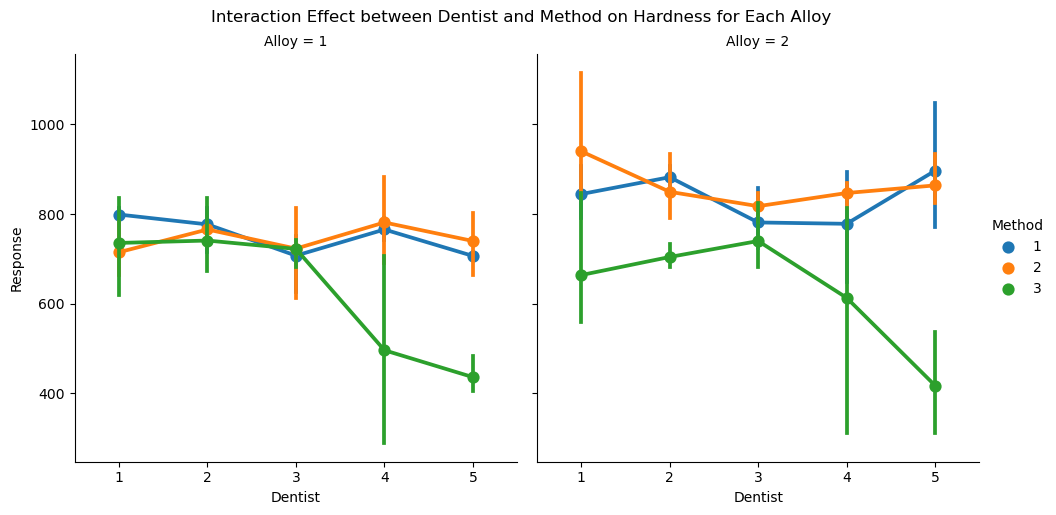

In [64]:
sns.catplot(x='Dentist', y='Response', hue='Method', col='Alloy', kind='point', data= implant_data)

plt.xlabel('Dentist')
plt.ylabel('Hardness')
plt.suptitle('Interaction Effect between Dentist and Method on Hardness for Each Alloy', y=1.02)

plt.show()

In both cases, the lines diverge or intersect, it suggests a significant interaction effect. This visual inspection aids in understanding how the dentist and method variables jointly influence implant hardness for each type of alloy.

##### 4. How does the hardness of implants vary depending on dentists and methods together?

Null Hypothesis (H0): There is no interaction effect between dentists and methods on implant hardness.

Alternate Hypothesis (H1): There is a significant interaction effect between dentists and methods on implant hardness.

In [66]:
# For Alloy Type 1
model_type_1 = ols('Response ~ C(Dentist) * C(Method)', data=implant_data[implant_data['Alloy'] == 1]).fit()
anova_type_1 = sm.stats.anova_lm(model_type_1, typ=2)
print(anova_type_1)

# For Alloy Type 2
model_type_2 = ols('Response ~ C(Dentist) * C(Method)', data=implant_data[implant_data['Alloy'] == 2]).fit()
anova_type_2 = sm.stats.anova_lm(model_type_2, typ=2)
print(anova_type_2)

                             sum_sq    df          F    PR(>F)
C(Dentist)            106683.688889   4.0   3.899638  0.011484
C(Method)             148472.177778   2.0  10.854287  0.000284
C(Dentist):C(Method)  185941.377778   8.0   3.398383  0.006793
Residual              205180.000000  30.0        NaN       NaN
                             sum_sq    df          F    PR(>F)
C(Dentist)             56797.911111   4.0   1.106152  0.371833
C(Method)             499640.400000   2.0  19.461218  0.000004
C(Dentist):C(Method)  197459.822222   8.0   1.922787  0.093234
Residual              385104.666667  30.0        NaN       NaN


For Alloy Type 1, both Dentist and Method have a significant impact on implant hardness, and there is a significant interaction effect between Dentist and Method.
For Alloy Type 2, Method significantly influences implant hardness, while Dentist does not show a clear significant effect. The interaction effect is not significant.